# 회귀 예측 모델 실습

- 데이터 파일 : `auto-mpg.csv` 

###  컬럼 정보 
- MPG (miles per gallon - 연비)
- cylinders (실린더 갯수)
- engine displacement (inches 배기량)
- horsepower (마력)
- vehicle weight (lbs. 무게)
- time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간)
- model year 
- origin of car (1. American,   2. European,   3. Japanese).
- Also provided are the car labels (types)

## [목표]
- mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

# 라이브러리, 데이터 로딩

In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# datas_ml\auto-mpg.csv
df = pd.read_csv('datas_ml/auto-mpg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [26]:
df['name'].value_counts()

name
amc matador        5
toyota corolla     5
ford pinto         5
toyota corona      4
amc hornet         4
                  ..
ford mustang gl    1
vw pickup          1
dodge rampage      1
ford ranger        1
chevy s-10         1
Name: count, Length: 301, dtype: int64

In [27]:
df['name'].nunique()

301

# X, y 데이터 분리

In [28]:
df.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')

In [29]:
# 예측할 정답
y = df['mpg']

- name은 제외

In [30]:
X = df.loc[:, 'cyl':'origin']
X

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


- name을 넣을 경우

In [31]:
X = df.drop('mpg', axis = 1)
X

,cyl,displ,hp,weight,accel,yr,origin,name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,4,97.0,52,2130,24.6,82,2,vw pickup
389,4,135.0,84,2295,11.6,82,1,dodge rampage
390,4,120.0,79,2625,18.6,82,1,ford ranger


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
X.head()

,cyl,displ,hp,weight,accel,yr,origin,name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
# name 컬럼을  onehotencoing 변환하기
# remainder='passthrough' 나머지는 통과시켜라는 듯

ct = ColumnTransformer([ ('encoder', OneHotEncoder(), [7]) ], remainder='passthrough')

In [35]:
X = ct.fit_transform(X)

# 학습용, 테스트용으로 분리

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
# train : test => 8:2로 분할, 재현을 위핸 random seed => 7
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

# 모델 학습

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr_model = LinearRegression()

In [46]:
# 학습하기전의 회귀선의 기울기 상태
lr_model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [48]:
# 학습 수행
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 검증하기

In [49]:
y_pred = lr_model.predict(X_test)

In [50]:
y_pred

array([28.01294697, 29.5766146 , 18.42014308, 36.5059319 , 17.73947255,
       18.7395999 , 17.34060222,  8.20127147, 29.09992088, 26.95906642,
       18.90764308, 20.29030059, 27.01950232, 29.72703494, 14.35295508,
       16.05738411, 21.84084669, 29.89268324,  6.48628736, 11.57436186,
       15.91945025, 31.98074253, 21.1410104 , 17.50618265, 14.25080592,
        9.47687531, 19.41541548, 32.44711419, 23.26015739, 17.38526545,
       20.23272031, 23.61615084, 28.05255982, 19.05129024, 24.19172915,
       28.1715929 , 30.48576446, 21.24229103, 15.89603877, 26.20708586,
       21.65960887, 20.98311522, 32.38042144, 25.71874565, 23.5874143 ,
       13.42209824, 15.09008445, 32.44773142, 19.88868864, 26.99991358,
       26.20139451, 10.97085822, 17.8571227 , 13.16413623, 16.64551829,
       27.05113406, 18.45371326, 26.216009  , 29.52278992, 26.3708316 ,
       40.58024064, 22.42217864, 20.17534155, 19.47117126, 32.4096568 ,
       31.45603048, 12.55288038, 26.77032238, 22.90113775, 16.46

- RMSE 계산

In [51]:
np.sqrt(((y_test - y_pred)**2).mean()) # RMSE

np.float64(4.055135561759338)

- R2 score

In [52]:
# 결정계수 계산
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score",r2)

R2 Score 0.7319806970435904


결정 계수 해석 : 

# 실제값과 모델예측 결과 시각화

In [ ]:
df_test = y_test.to_frame()


In [56]:
df_test['y_pred'] = y_pred
df_test

,mpg,y_pred
241,21.5,28.012947
366,29.0,29.576615
298,23.9,18.420143
341,35.1,36.505932
263,17.5,17.739473
...,...,...
299,34.2,31.175611
119,19.0,22.262543
97,16.0,19.175572
188,14.5,16.307618


In [57]:
# df_test 데이터 프레임 인덱스 reset하기
df_test = df_test.reset_index(drop=True)

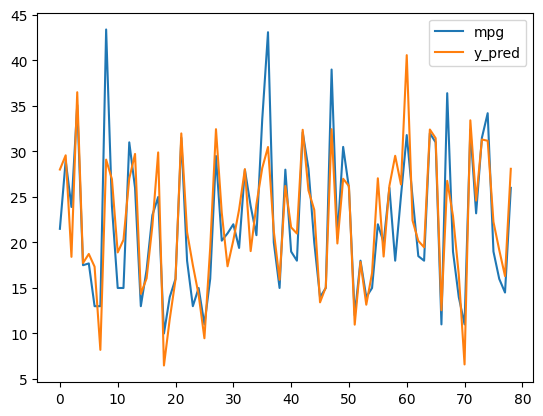

In [58]:
df_test.plot()
plt.show()